In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Numba tests

In [333]:
import numba as nb

In [334]:
@nb.njit(parallel=True)
def numba_(a, shf):
    b = np.empty_like(a)
    rows_num = a.shape[0]
    cols_num = a.shape[1]
    for i in nb.prange(rows_num):
        b[i, shf:] = a[i, :cols_num - shf]
        b[i, :shf] = a[i, cols_num - shf:]
    return b

## Replace np.roll

In [340]:
a=np.random.rand(10000,5000)

In [346]:
%%timeit 
numba_(a, 4999)

58.8 ms ± 850 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [345]:
%%timeit 
np.roll(a, -1, axis=1)

78.6 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Not sure if using all CPU is worth it

## Replace convolve2d

In [350]:
from scipy.signal import convolve2d

In [347]:
L=np.array([[1/4,1/2,1/4], [1/2, -3,1/2], [1/4,1/2,1/4]])

In [348]:
a=np.random.rand(10000,5000)

In [351]:
%%timeit 
convolve2d(a, L, mode='same', boundary='wrap')

2.03 s ± 59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit 


# Magnetization

In [8]:
lx=10000
ly=3000
rho0=10
v=1
D=1
beta=2
directory='PDEs_asympt_prof_lx%s_ly%s_rho%s_v%s_D%s_beta%s_r1'%(str(lx), str(ly), str(rho0), str(v), str(D), str(beta))

df_m={}

for t in np.arange(40):
    df_m[t]=pd.read_parquet(directory+'/asympt_mag_prof_lx%s_ly%s_rho%s_v%s_D%s_beta%s_r1_t%d.parquet'%(str(lx), str(ly), str(rho0), str(v), str(D), str(beta),t*500))



FileNotFoundError: [Errno 2] No such file or directory: 'PDEs_asympt_prof_lx10000_ly3000_rho10_v1_D1_beta2_r1/asympt_mag_prof_lx10000_ly3000_rho10_v1_D1_beta2_r1_t3500.parquet'

In [13]:
df_rho={}
for t in np.arange(40):
    df_rho[t]=pd.read_parquet(directory+'/asympt_density_prof_lx%s_ly%s_rho%s_v%s_D%s_beta%s_r1_t%d.parquet'%(str(lx), str(ly), str(rho0), str(v), str(D), str(beta),t*500))


FileNotFoundError: [Errno 2] No such file or directory: 'PDEs_asympt_prof_lx10000_ly3000_rho10_v1_D1_beta2_r1/asympt_density_prof_lx10000_ly3000_rho10_v1_D1_beta2_r1_t3500.parquet'

## Some profiles

In [ ]:
V=np.max(np.max(np.abs(df_m[6])))

for t in :
    m=df_m[t].values

    plt.matshow(m, cmap='PiYG', vmin=-V, vmax=V)
    plt.colorbar()

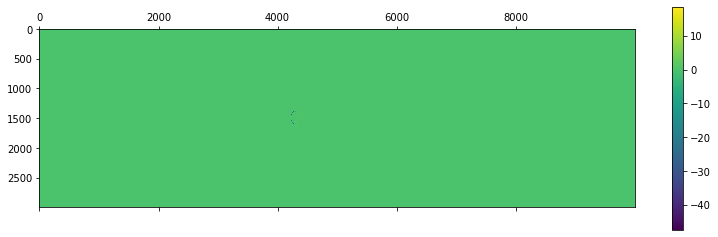

In [21]:
t=2
m=df_m[t]
rho=df_rho[t]
r=1
plt.matshow(2*m*(beta -1 -r/rho) - (beta*beta*(1-beta/3))*(m*m*m)/(rho*rho) )
plt.colorbar()

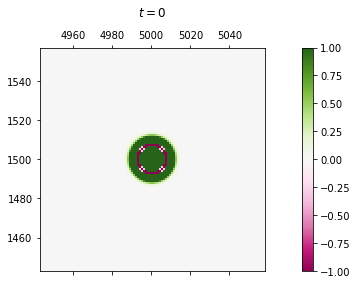

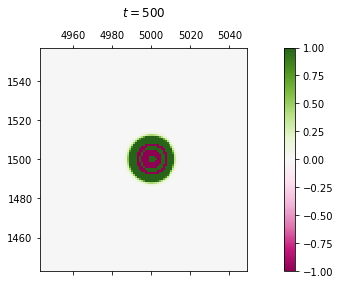

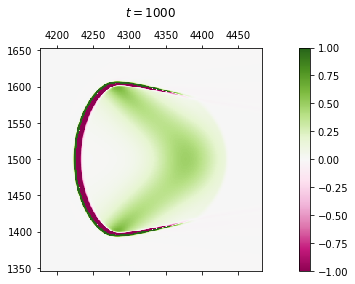

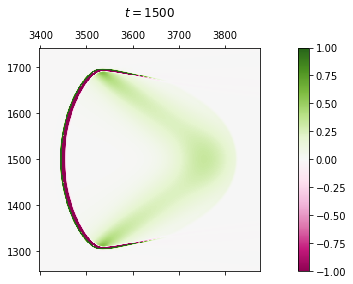

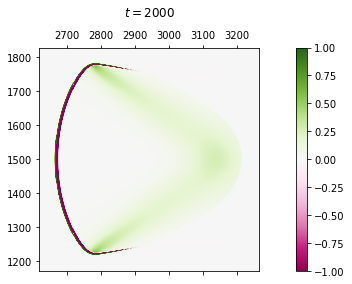

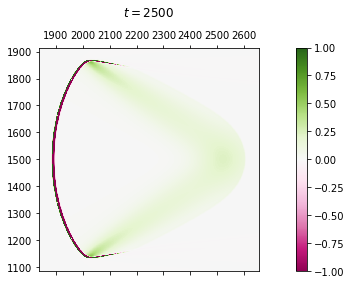

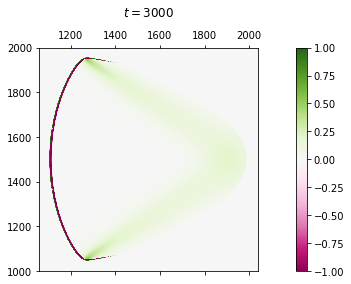

In [25]:
V=np.max(np.max(np.abs(df_m[6])))
V=1

for t in list(df_m):
    m=df_m[t].values
    rho=df_rho[t].values
    xmin=np.where((np.roll(m[np.int64(ly/2),:],1)>0)&(m[np.int64(ly/2),:]<0))[0][0]
    xmax=np.where(m[np.int64(ly/2),xmin:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=np.int64(ly/2)#np.argmax(np.sum(m<0, axis=0))
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)
    
    plt.matshow(2*m*(beta -1 -r/rho) - (beta*beta*(1-beta/3))*(m*m*m)/(rho*rho) , cmap='PiYG', vmin=-V, vmax=V)
    plt.colorbar()
    offset=50
    plt.xlim(xmin-offset, xmax+offset)
    plt.ylim(ymin-offset, ymax+offset)
    plt.title(r'$t=%d$'%(500*t), pad=20)

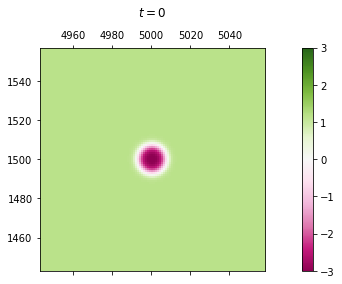

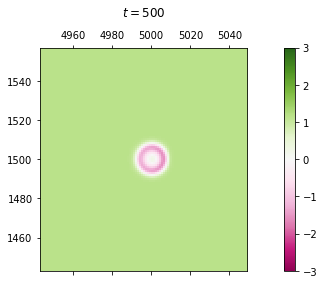

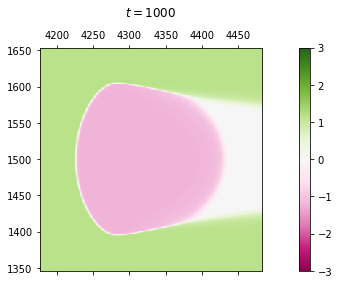

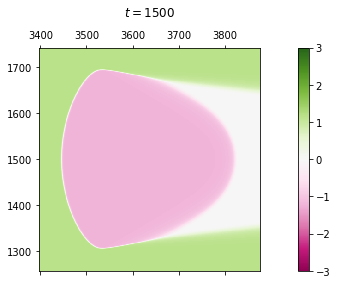

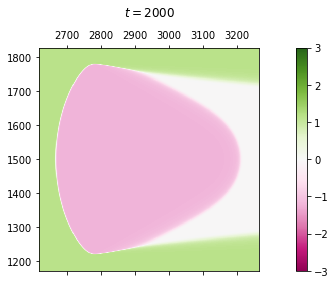

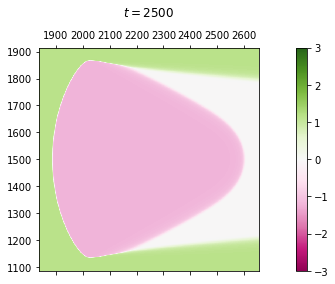

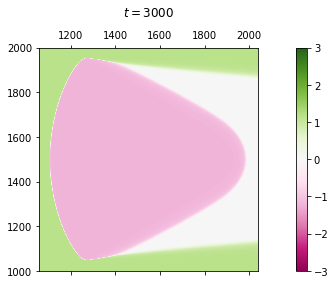

In [28]:
V=np.max(np.max(np.abs(df_m[6])))
V=3

for t in list(df_m):
    m=df_m[t].values
    rho=df_rho[t].values
    xmin=np.where((np.roll(m[np.int64(ly/2),:],1)>0)&(m[np.int64(ly/2),:]<0))[0][0]
    xmax=np.where(m[np.int64(ly/2),xmin:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=np.int64(ly/2)#np.argmax(np.sum(m<0, axis=0))
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)
    
    plt.matshow(m/rho , cmap='PiYG', vmin=-V, vmax=V)
    plt.colorbar()
    offset=50
    plt.xlim(xmin-offset, xmax+offset)
    plt.ylim(ymin-offset, ymax+offset)
    plt.title(r'$t=%d$'%(500*t), pad=20)

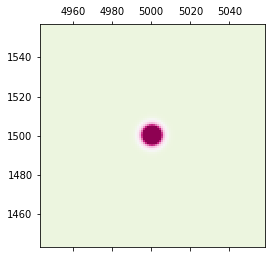

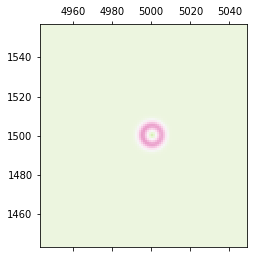

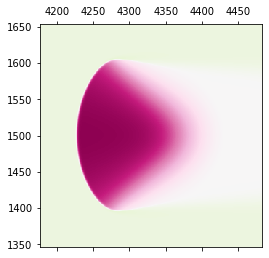

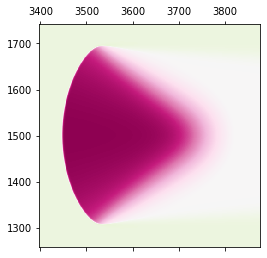

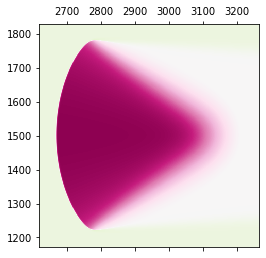

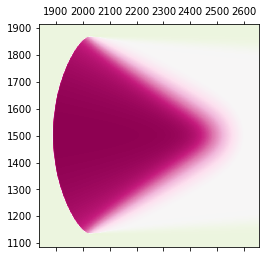

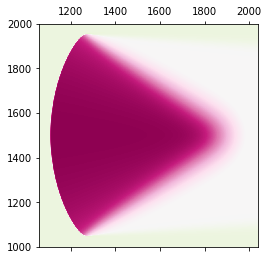

In [10]:
V=np.max(np.max(np.abs(df_m[6])))

for t in list(df_m):
    m=df_m[t].values
    xmin=np.where((np.roll(m[np.int64(ly/2),:],1)>0)&(m[np.int64(ly/2),:]<0))[0][0]
    xmax=np.where(m[np.int64(ly/2),xmin:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=np.int64(ly/2)#np.argmax(np.sum(m<0, axis=0))
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)
    
    plt.matshow(m, cmap='PiYG', vmin=-V, vmax=V)
    
    offset=50
    plt.xlim(xmin-offset, xmax+offset)
    plt.ylim(ymin-offset, ymax+offset)

[  0.          -5.40460265 -10.80920529 -16.21380794 -21.61841058]


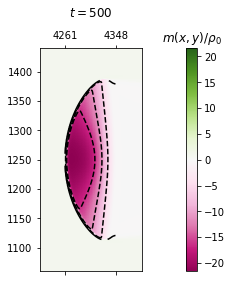

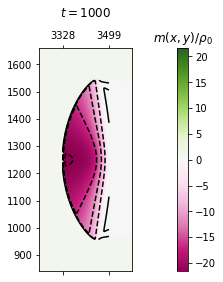

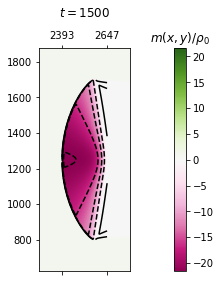

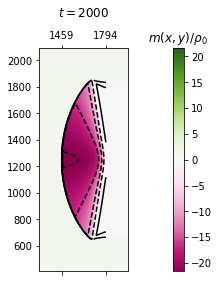

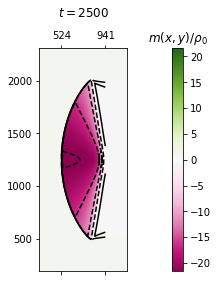

In [753]:
rho0=1
V=np.max(np.max(np.abs(df_m[6])))/rho0
print(np.linspace(0, -V, 5))
for t in [5, 10, 15, 20, 25]:
    m=df_m[t].values/rho0
    xmin=np.where((np.roll(m[np.int64(ly/2),:],1)>0)&(m[np.int64(ly/2),:]<0))[0][0]
    xmax=np.where(m[np.int64(ly/2),xmin:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=np.int64(ly/2)#np.argmax(np.sum(m<0, axis=0))
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)

    l=plt.matshow(m, cmap='PiYG', vmin=-V, vmax=V)
    cbar=plt.colorbar(l)
    cbar.ax.set_title(r'$m(x,y)/\rho_0$', rotation=0)

    offsetx=0.5*(xmax-xmin)
    offsety=0.2*(ymax-ymin)
    plt.xlim(xmin-offsetx, xmax+offsetx)
    plt.ylim(ymin-offsety, ymax+offsety)

    
    xlist = np.arange(xmin, xmax)
    ylist = np.arange(ymin, ymax)
    X, Y = np.meshgrid(xlist, ylist)
    Z = m[ymin:ymax,xmin:xmax]
    cp = plt.contour(X, Y, Z, levels=np.linspace(0, -V, 5)[::-1], colors=['k'])
    
    plt.xticks([xmin, xmax])
    plt.title(r'$t=%d$'%(100*t), pad=20)
    plt.show()
    



[  0.          -3.259527    -6.51905401  -9.77858101 -13.03810802]


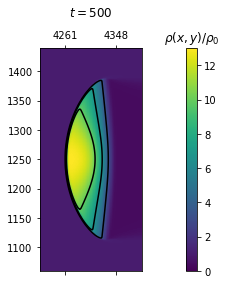

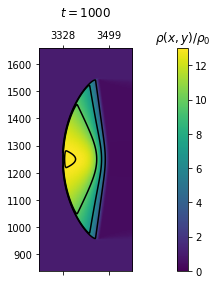

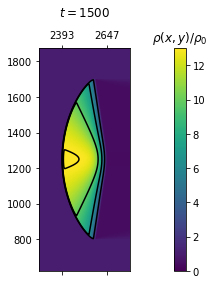

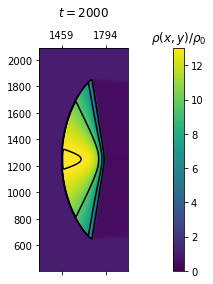

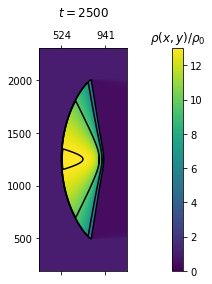

In [772]:
rho0=1
V=np.max(np.max(np.abs(df_rho[5])))/rho0
print(np.linspace(0, -V, 5))
for t in [5, 10, 15, 20, 25]:
    m=df_m[t].values/rho0
    xmin=np.where((np.roll(m[np.int64(ly/2),:],1)>0)&(m[np.int64(ly/2),:]<0))[0][0]
    xmax=np.where(m[np.int64(ly/2),xmin:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=np.int64(ly/2)#np.argmax(np.sum(m<0, axis=0))
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)

    rho=df_rho[t].values/rho0
    l=plt.matshow(rho, cmap='viridis', vmin=0, vmax=V)
    cbar=plt.colorbar(l)
    cbar.ax.set_title(r'$\rho(x,y)/\rho_0$', rotation=0)

    offsetx=0.5*(xmax-xmin)
    offsety=0.2*(ymax-ymin)
    plt.xlim(xmin-offsetx, xmax+offsetx)
    plt.ylim(ymin-offsety, ymax+offsety)

    
    xlist = np.arange(xmin, xmax)
    ylist = np.arange(ymin, ymax)
    X, Y = np.meshgrid(xlist, ylist)
    Z = rho[ymin:ymax,xmin:xmax]
    cp = plt.contour(X, Y, Z, levels=np.linspace(0, V, 5), colors=['k'])
    
    plt.xticks([xmin, xmax])
    plt.title(r'$t=%d$'%(100*t), pad=20)
    plt.show()
    



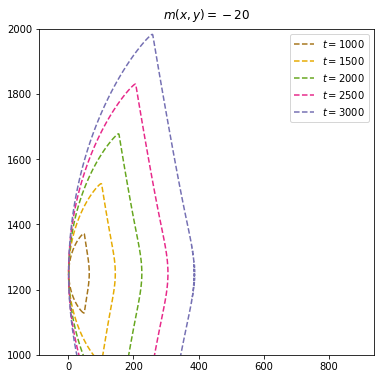

In [744]:
plt.figure(figsize=(6,6))
k=2
cp=[]
for t in [5, 10, 15, 20, 25]:
    m=df_m[t].values
    xmin=np.where((np.roll(m[np.int64(ly/2),:],1)>0)&(m[np.int64(ly/2),:]<0))[0][0]
    xmax=np.where(m[np.int64(ly/2),xmin:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=np.int64(ly/2)
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)

    xlist = np.arange(0, xmax-xmin)
    ylist = np.arange(ymin, ymax)
    X, Y = np.meshgrid(xlist, ylist)
    Z = m[ymin:ymax,xmin:xmax]
    cp.append(plt.contour(X, Y, Z, levels=[-10], colors=[plt.get_cmap('Dark2_r')((k-1)/7)]))
    
    k+=1
plt.axis('equal') 
plt.ylim(1000, 2000)
plt.xlim(-50, 900)
plt.title(r'$m(x,y)=-20$', pad=10)
plt.legend([cp[k].legend_elements()[0][0] for k in range(5)], [r'$t=%d$'%(500*k) for k in range(2,7)])
    

In [272]:
np.where(m[np.int64(ly/2),xmin:]>th_mag)[0][0]+xmin


4226

Text(0.5, 1.0, '$\\rho(x, y=1500)$')

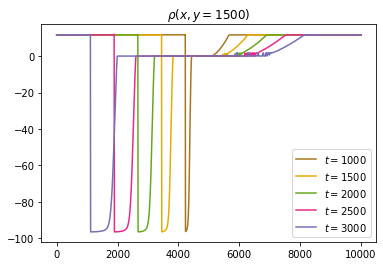

In [275]:
for t in list(df_m)[2:]:
    rho=df_m[t].values
    plt.plot(rho[1500,:], label=r'$t=%d$'%(500*t))
plt.legend()
plt.title(r'$\rho(x, y=1500)$')

In [283]:
ymin,ymax,xmin,xmax

(1396, 1604, 4226, 4226)

In [282]:
m=df_m[t].values
xmin=np.where((np.roll(m[np.int64(ly/2),:],1)>0)&(m[np.int64(ly/2),:]<0))[0][0]
xmax=np.where(m[np.int64(ly/2),xmin:]>th_mag)[0][0]+xmin

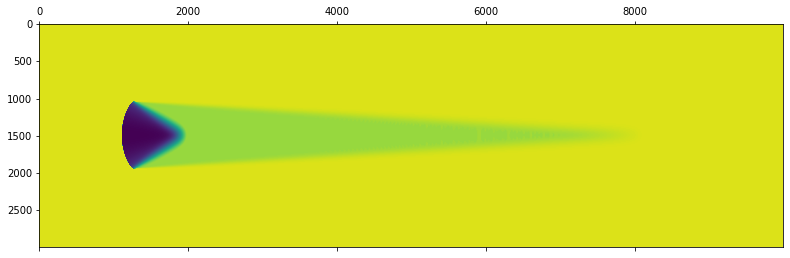

In [11]:
plt.matshow(m)

In [285]:
np.where((np.roll(m[np.int64(ly/2),:],1)>0)&(m[np.int64(ly/2),:]<0))[0][0]

4226

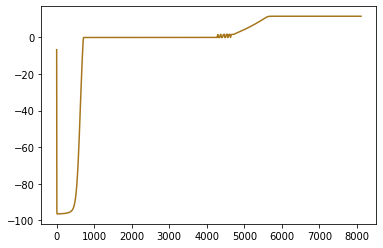

In [289]:
plt.plot(m[np.int64(ly/2),xmin:])

In [286]:
np.where(m[np.int64(ly/2),xmin:]>th_mag)[0][0]

0

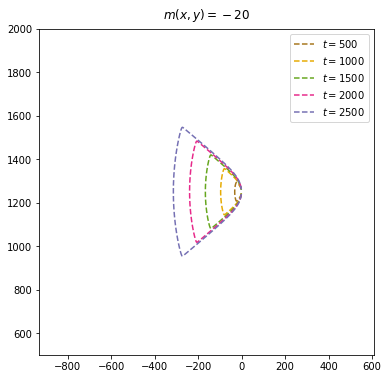

In [757]:

plt.figure(figsize=(6,6))

th_mag=-20
k=2
cp=[]
for t in [5, 10, 15, 20, 25]:
    m=df_m[t].values
    xmin=np.where((np.roll(m[np.int64(ly/2),:],1)>0)&(m[np.int64(ly/2),:]<0))[0][0]
    xmax=np.where(m[np.int64(ly/2),np.argmin(m[np.int64(ly/2),:]):]>th_mag)[0][0]+np.argmin(m[np.int64(ly/2),:])
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=np.int64(ly/2)
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)

    xlist = np.arange(xmin-xmax,0 )
    ylist = np.arange(ymin, ymax)
    X, Y = np.meshgrid(xlist, ylist)
    Z = m[ymin:ymax,xmin:xmax]
    cp.append(plt.contour(X, Y, Z, levels=[th_mag], colors=[plt.get_cmap('Dark2_r')((k-1)/7)]))
    
    k+=1
plt.axis('equal') 
plt.ylim(500, 2000)
plt.title(r'$m(x,y)=%d$'%th_mag, pad=10)
plt.legend([cp[k].legend_elements()[0][0] for k in range(5)], [r'$t=%d$'%(100*t) for t in [5, 10, 15, 20, 25]])
    

## Check rotational symmetry

In [399]:
def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)


In [400]:
p=[(xi, yi) for (xi, yi) in zip(x,y-1500)]

In [401]:
rot=rotate(p, origin=(0, 0), degrees=-75)
xrot, yrot = rot[:,0], rot[:,1]

4280


(-142.62837351077906,
 5.74420826241805,
 -106.53475441951586,
 106.53475441951586)

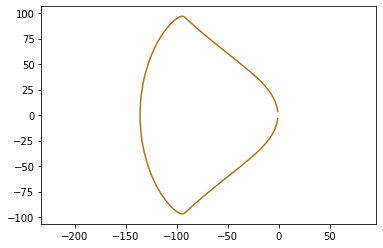

In [412]:
m=df_m[2].values
xmin=np.where((np.roll(m[np.int64(ly/2),:],1)>0)&(m[np.int64(ly/2),:]<0))[0][0]
xmax=np.where(m[np.int64(ly/2),np.argmin(m[np.int64(ly/2),:]):]>th_mag)[0][0]+np.argmin(m[np.int64(ly/2),:])

Lmax=np.max(np.sum(m<0, axis=0))
yM=np.int64(ly/2)
ymin=yM-np.int64(0.5*Lmax)
ymax=yM+np.int64(0.5*Lmax)

xlist = np.arange(xmin-xmax,0 )
ylist = np.arange(ymin, ymax)
X, Y = np.meshgrid(xlist, ylist)
Z = m[ymin:ymax,xmin:xmax]

xmax=np.argmax(np.sum(m<0, axis=0))

print(xmax)
plt.plot(x[x<xmax], (y-1500)[x<xmax])
#plt.plot(xrot, yrot)
plt.axis('equal')

## Check shape evolution

In [567]:
xprof=[]
yprof=[]

for k in range(5):
    p = cp[k].collections[0].get_paths()[0]
    v = p.vertices
    xprof.append(v[:,0]) 
    yprof.append(v[:,1])

(-826.9376537962646, 38.33036446648879, 1007.105396159192, 1992.894603840808)

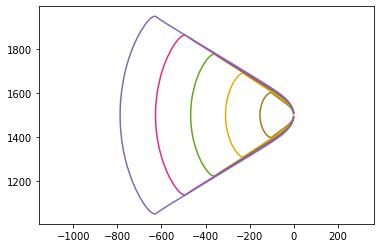

In [568]:
for k in range(5):
    plt.plot(xprof[k], yprof[k], '-')
plt.axis('equal')

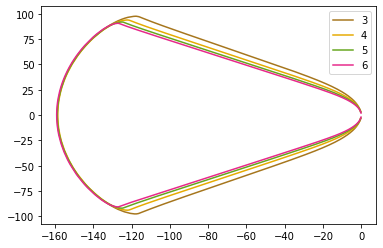

In [680]:
scalex=0
scaley=1

for k in range(3,7):
    plt.plot((xprof[k-2])/(k-1.05), (yprof[k-2]-1500)/(k-1.05), '-', label=k)
plt.legend()

In [545]:
np.where((np.abs(yprof[3]-1500)<.1))

(array([1340]),)

In [619]:
x0=[]
for k in range(0,7):
    print(np.where((np.abs(yprof[k-2]-1500)<.1))[0])
    x0.append(xprof[k-2][np.where((np.abs(yprof[k-2]-1500)<.1))[0][0]])
x0=np.array(x0)

[1340]
[1674]
[349]
[683]
[1010]
[1340]
[1674]


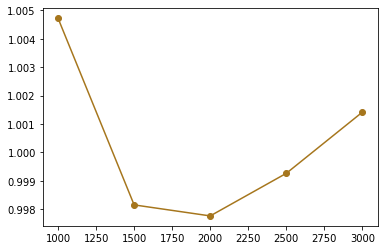

In [625]:
plt.plot(500*np.arange(2,7), (-x0[2:]+165.15)/(500*0.31713598*np.arange(2,7)), 'o-')

In [582]:
np.polyfit(500*np.arange(2,7), x0[2:], deg=1)

array([ -0.31713598, 165.15596701])

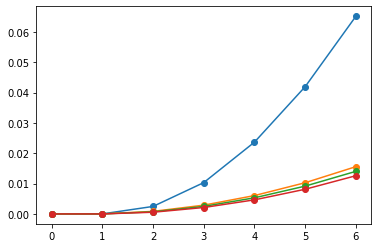

In [223]:
plt.plot([np.mean(df_m[t].values<0) for t in df_m], 'o-')
plt.plot([np.mean(df_m[t].values<-20) for t in df_m], 'o-')
plt.plot([np.mean(df_m[t].values<-40) for t in df_m], 'o-')
plt.plot([np.mean(df_m[t].values<-60) for t in df_m], 'o-')

In [226]:
df_m[t]

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,...,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895
1,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,...,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895
2,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,...,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895
3,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,...,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895
4,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,...,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,...,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895
2996,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,...,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895
2997,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,...,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895
2998,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,...,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895,11.61895


## Cross sections

In [241]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[plt.get_cmap('Dark2')(a) for a in np.arange(0.,0.9,0.12)][::-1]) 

Text(0.5, 1.0, '$\\rho(x=x_W, y)$')

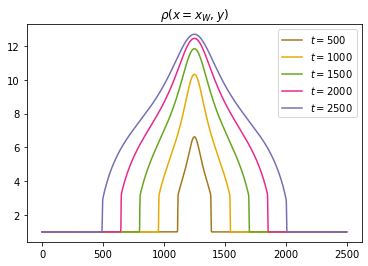

In [760]:
for t in [5, 10, 15, 20, 25]:
    m=df_m[t].values
    xmax=np.argmax(np.sum(m<0, axis=0))
    
    rho=df_rho[t].values
    plt.plot(rho[:,xmax], label=r'$t=%d$'%(100*t))
plt.legend()
plt.title(r'$\rho(x=x_W, y)$')

Text(0.5, 1.0, '$\\rho(x, y=1250)$')

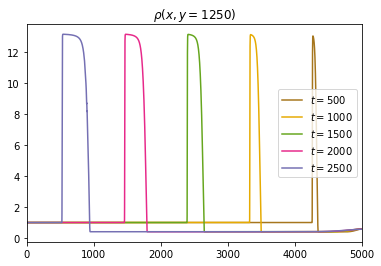

In [767]:
for t in [5, 10, 15, 20, 25]:
    rho=df_rho[t].values
    plt.plot(rho[1250,:], label=r'$t=%d$'%(100*t))
plt.legend()
plt.xlim(0,5000)
plt.title(r'$\rho(x, y=1250)$')

## Check velocity formula

Text(0.5, 0, '$t$')

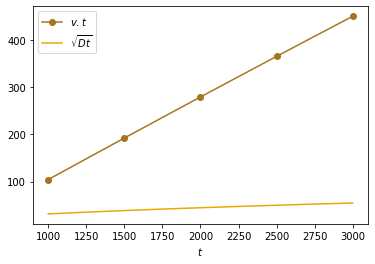

In [684]:
abs_t=np.linspace(1000,3000,5)
plt.plot(abs_t, [np.max(np.sum(df_m[t].values<0, axis=0))/2 for t in df_m][2:], 'o-', label=r'$v.t$')

D=1
abs_t2=np.linspace(1000,3000,100)

plt.plot(abs_t2, np.sqrt(D*abs_t2), label=r'$\sqrt{Dt}$')
plt.legend()
plt.xlabel(r'$t$')

Text(0.5, 0, '$t$')

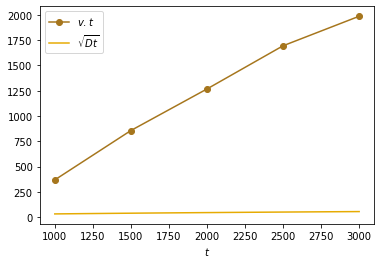

In [481]:
abs_t=np.linspace(1000,3000,5)
plt.plot(abs_t, [np.max(np.sum(df_m[t].values<0, axis=1))/2 for t in df_m][2:], 'o-', label=r'$v.t$')

D=1
abs_t2=np.linspace(1000,3000,100)

plt.plot(abs_t2, np.sqrt(D*abs_t2), label=r'$\sqrt{Dt}$')
plt.legend()
plt.xlabel(r'$t$')

In [685]:
np.polyfit(abs_t, [np.max(np.sum(df_m[t].values<0, axis=0))/2 for t in df_m][2:], deg=1)

array([  0.173, -67.5  ])

In [774]:
xfront=[]
for t in df_m:
    m=df_m[t].values
    xmin=np.where((np.roll(m[np.int64(ly/2),:],1)>0)&(m[np.int64(ly/2),:]<0))[0][0]
    xfront.append(xmin)

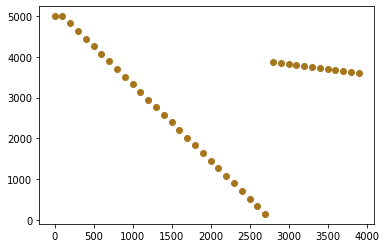

In [777]:
plt.plot(100*np.array(list(df_m)), xfront, 'o')

In [779]:
np.polyfit(100*np.array(list(df_m))[1:15], xfront[1:15], deg=1)

array([-1.86334066e+00,  5.19079121e+03])

In [783]:
rho=df_rho[5].values
Drho=np.max(rho[1250,:])-rho[1250,0]
Drho

12.038108015864974

In [784]:
m=df_m[5].values
Dm=np.min(m[1250,:])-m[1250,0]
Dm

-22.529032151906627

In [785]:
Dm/Drho

-1.8714761590621802

# Density

In [126]:
df_rho={}
for t in np.arange(10):
    df_rho[t]=pd.read_parquet('asympt_density_prof_lx10000_ly3000_rho10_v1_D1_beta2_r1_t%d.parquet'%(t*500))

FileNotFoundError: [Errno 2] No such file or directory: 'asympt_density_prof_lx10000_ly3000_rho10_v1_D1_beta2_r1_t3500.parquet'

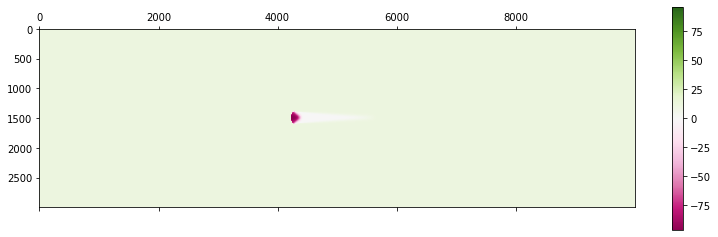

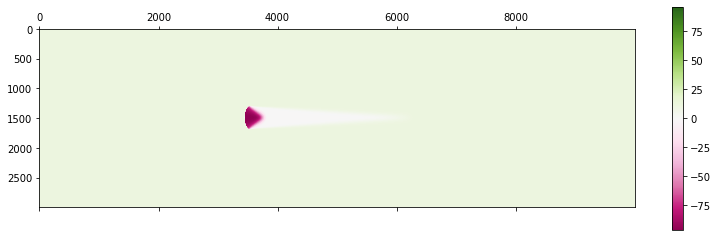

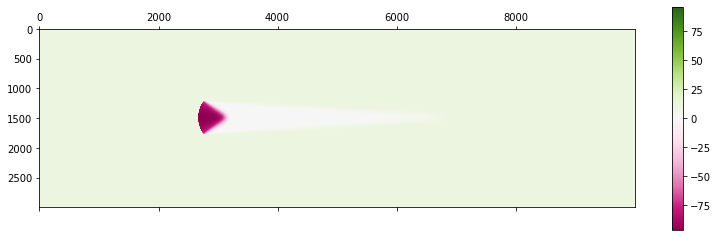

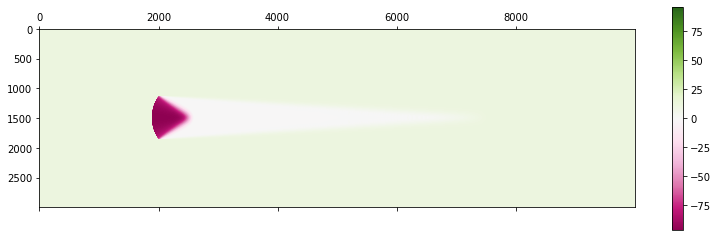

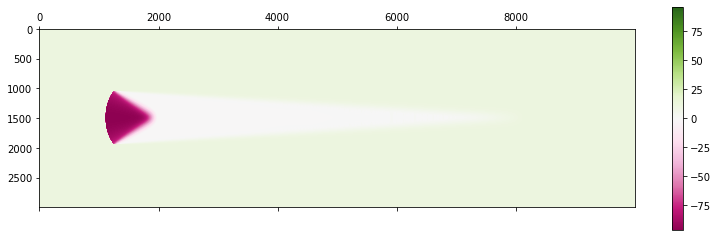

In [77]:
V=np.max(np.max(np.abs(df_m[6])))

for t in list(df_m)[2:]:
    m=df_m[t].values

    plt.matshow(m, cmap='PiYG', vmin=-V, vmax=V)
    plt.colorbar()

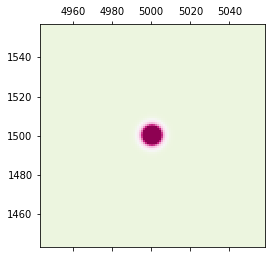

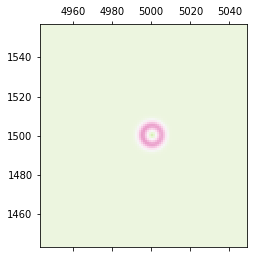

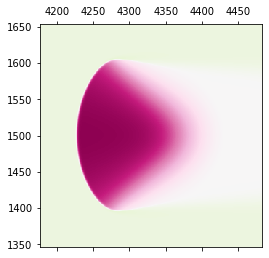

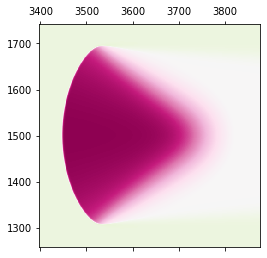

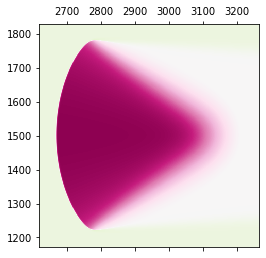

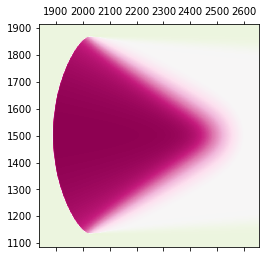

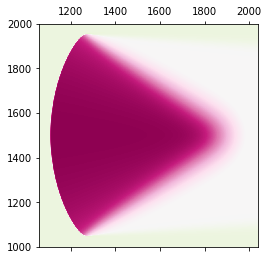

In [79]:
for t in list(df_m):
    m=df_m[t].values
    xmin=np.where((np.roll(m[np.int64(ly/2),:],1)>0)&(m[np.int64(ly/2),:]<0))[0][0]
    xmax=np.where(m[np.int64(ly/2),xmin:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=np.int64(ly/2)#np.argmax(np.sum(m<0, axis=0))
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)
    
    plt.matshow(m, cmap='PiYG', vmin=-V, vmax=V)
    
    offset=50
    plt.xlim(xmin-offset, xmax+offset)
    plt.ylim(ymin-offset, ymax+offset)

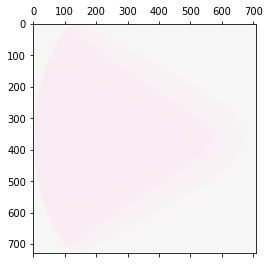

In [87]:
plt.matshow(Z, cmap='PiYG', vmin=-V, vmax=V)

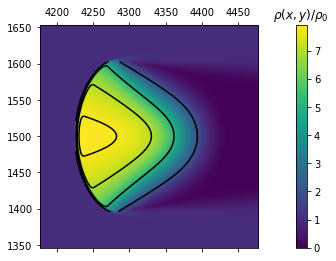

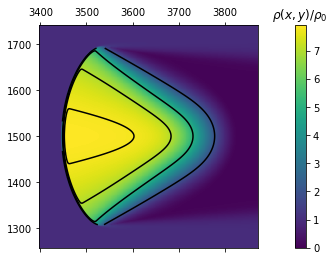

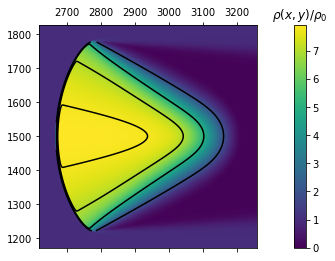

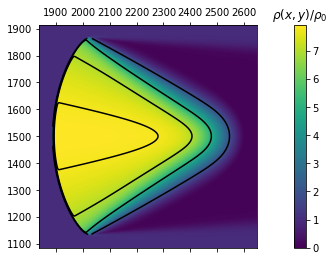

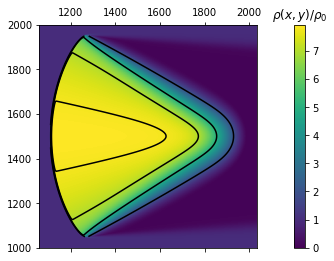

In [147]:
rho0=10
V=np.max(np.max(np.abs(df_rho[6])))/rho0
k=2
for t in list(df_rho)[2:]:
    rho=df_rho[t].values/rho0
    m=df_m[t].values/rho0

    xmin=np.where((np.roll(m[np.int64(ly/2),:],1)>0)&(m[np.int64(ly/2),:]<0))[0][0]
    xmax=np.where(m[np.int64(ly/2),xmin:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=np.int64(ly/2)#np.argmax(np.sum(m<0, axis=0))
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)

    l=plt.matshow(rho, cmap='viridis', vmin=0, vmax=V)
    cbar=plt.colorbar(l)
    cbar.ax.set_title(r'$\rho(x,y)/\rho_0$', rotation=0)
    offset=50
    plt.xlim(xmin-offset, xmax+offset)
    plt.ylim(ymin-offset, ymax+offset)
    
    xlist = np.arange(xmin, xmax)
    ylist = np.arange(ymin, ymax)
    X, Y = np.meshgrid(xlist, ylist)
    Z = rho[ymin:ymax,xmin:xmax]
    cp = plt.contour(X, Y, Z, levels=np.array([20,50,70,78])/rho0, colors=['k'])
    #plt.title(r'$t=%d$'%(500*k), pad=20)
    k+=1
    plt.show()
    

